In [2]:
import math
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib 
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

%matplotlib inline
# %load_ext autoreload
# %autoreload 2
%reload_ext autoreload
import imblearn as imb
# print("imblearn version: ",imblearn.__version__)

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

import sys
sys.path.append('../../../')
import utils
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_GSCV import *



In [4]:
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/'
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/inhib'
train_x_df = pd.read_csv(split_path+"/inhib_train_x_scaledoriginal.csv", header=None)
train_y_df= pd.read_csv(split_path+"/inhib_train_y_scaledoriginal.csv", header=None)
test_x_df= pd.read_csv(split_path+"/inhib_test_x_scaledoriginal.csv", header=None)
test_y_df= pd.read_csv(split_path+"/inhib_test_y_scaledoriginal.csv", header=None)
train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((1635, 306), (1635,), (409, 306), (409,))

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.946, precision: 0.636, recall: 0.500, specificity: 0.979


<Figure size 600x400 with 0 Axes>

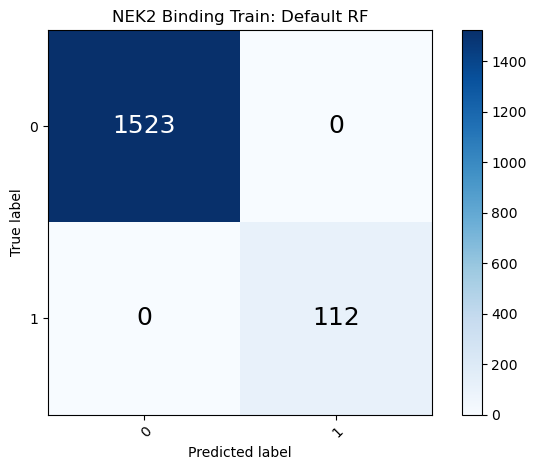

<Figure size 600x400 with 0 Axes>

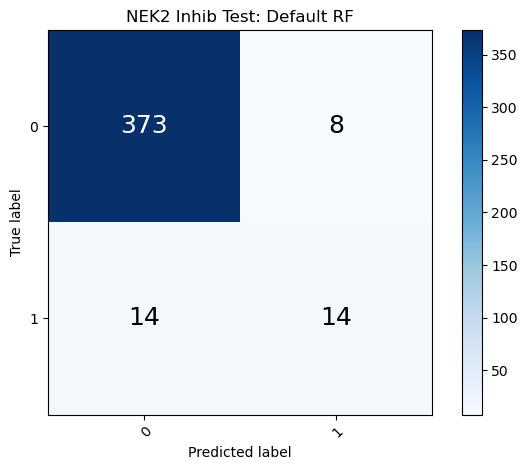

In [6]:
# test a couple
rf_trial1 = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {})
plot_confusion_matrix(train_y, rf_trial1['train_pred'], ['0','1'], title='NEK2 Binding Train: Default RF')
plot_confusion_matrix(test_y, rf_trial1['test_pred'], ['0','1'], title='NEK2 Inhib Test: Default RF')

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.934, precision: 0.519, recall: 0.500, specificity: 0.966


<Figure size 600x400 with 0 Axes>

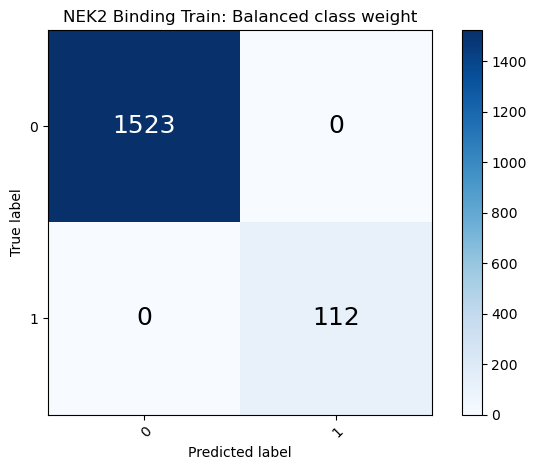

<Figure size 600x400 with 0 Axes>

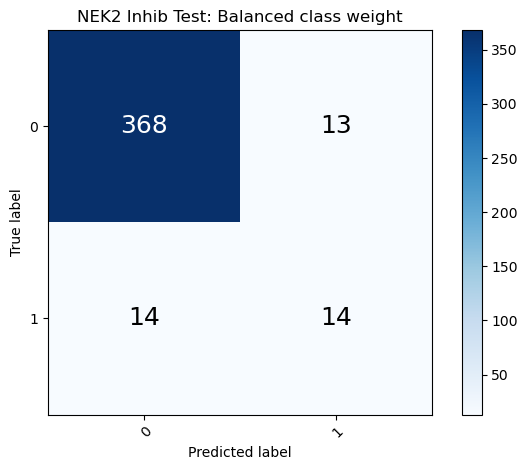

In [8]:
rf_trial3 = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {'class_weight':'balanced'})
plot_confusion_matrix(train_y, rf_trial3['train_pred'], ['0','1'], title='NEK2 Binding Train: Balanced class weight')
plot_confusion_matrix(test_y, rf_trial3['test_pred'], ['0','1'], title='NEK2 Inhib Test: Balanced class weight')

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 0.906, precision: 0.421, recall: 1.000, specificity: 0.899
TEST: accuracy: 0.895, precision: 0.364, recall: 0.714, specificity: 0.908


<Figure size 600x400 with 0 Axes>

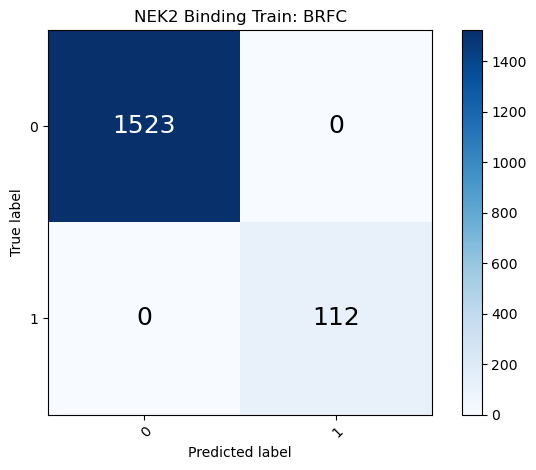

<Figure size 600x400 with 0 Axes>

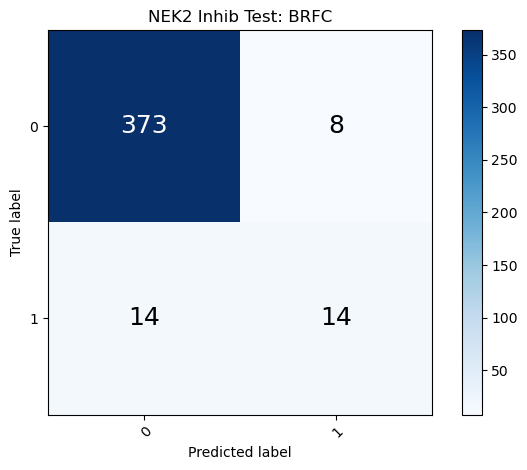

In [7]:
rf_trial2 = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {})
plot_confusion_matrix(train_y, rf_trial1['train_pred'], ['0','1'], title='NEK2 Binding Train: BRFC')
plot_confusion_matrix(test_y, rf_trial1['test_pred'], ['0','1'], title='NEK2 Inhib Test: BRFC')

In [9]:
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

# Note 
I got my almost perfect classifiers with these exact files and data files 
When I first got those results I reran the cells and files over again just to check, but creating this new file I got different results. 


TRAIN: accuracy: 0.888, precision: 0.375, recall: 0.946,  specificity: 0.884
TEST: accuracy: 0.927, precision: 0.483, recall: 1.000, specificity: 0.921


BalancedRandomForestClassifier(bootstrap=False, criterion='entropy',
                               max_depth=20, max_features=None,
                               min_samples_leaf=2, min_samples_split=4)

<Figure size 600x400 with 0 Axes>

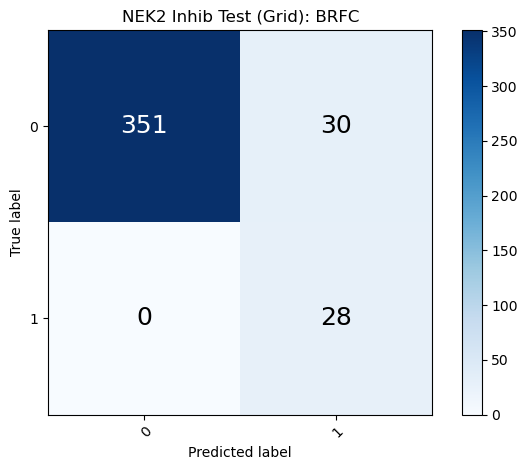

In [21]:
save_file1 = 'atom_nek2inhib_BRFC_best.pkl'
# inhib_grid1 = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {}, param_grid, 2)


with open('best_models/'+save_file1, 'rb') as f: 
    inhib_grid1 = pickle.load(f) 
grid_results1 = rf_results2(inhib_grid1, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, grid_results1['test_pred'], ['0','1'], title='NEK2 Inhib Test (Grid): BRFC')
inhib_grid1

TRAIN: accuracy: 0.887, precision: 0.372, recall: 0.946,  specificity: 0.882
TEST: accuracy: 0.924, precision: 0.475, recall: 1.000, specificity: 0.919


BalancedRandomForestClassifier(bootstrap=False, max_depth=200,
                               max_features=None, min_samples_leaf=2,
                               min_samples_split=4)

<Figure size 600x400 with 0 Axes>

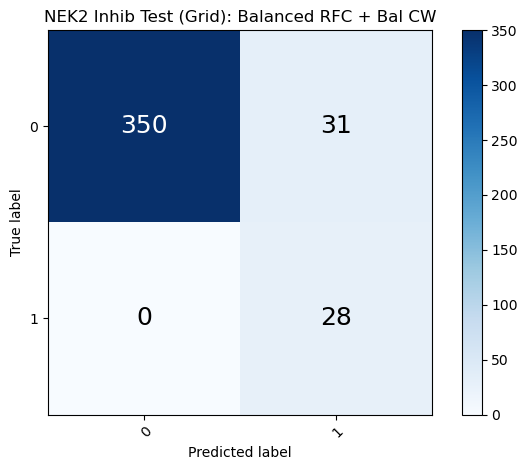

In [20]:
save_file2 = 'atom_nek2inhib_BRFC_BCW_best.pkl'
# grid2 = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True}, param_grid, 2)

with open('best_models/'+save_file2, 'rb') as f: 
    grid2 = pickle.load(f) 
grid_results2 = rf_results2(grid2, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, grid_results2['test_pred'], ['0','1'], title='NEK2 Inhib Test (Grid): Balanced RFC + Bal CW')

grid2